In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
import pydataset as data

import acquire
import prepare as prep

from env import get_db_url

# Data Acquisition Exercises

## 1- 3 : Creating Repository, modifying and including .gitignore. 

## 4. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [2]:
# Importing Iris dataset and creating a DataFrame:

sns.load_dataset('iris')

df_iris = pd.DataFrame(sns.load_dataset('iris'))

### a. print the first 3 rows

In [3]:
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


### b. print the number of rows and columns (shape)

In [4]:
df_iris.shape

#150 Rows, 5 Columns

(150, 5)

### c. Print the column names

In [5]:
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

### d. print the data type of each column

In [6]:
df_iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

### e. print the summary statistics for each of the numeric variables

In [7]:
df_iris.sepal_length.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [8]:
df_iris.sepal_width.describe()

count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64

In [9]:
df_iris.petal_length.describe()

count    150.000000
mean       3.758000
std        1.765298
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal_length, dtype: float64

In [10]:
df_iris.petal_width.describe()

count    150.000000
mean       1.199333
std        0.762238
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal_width, dtype: float64

## 5. Read the Table1_CustDetails table from your spreadsheet exercises google sheet into a dataframe named df_google_sheets.

In [11]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1adWbq9gXVUsjV5NuAfOM7yFpU5AbRoNC4uKPm5r-xJI/edit#gid=1825007169'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_googlesheet = pd.read_csv(csv_export_url)
df_googlesheet.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,average_charges,average_charge_true,phone_service_type,service_type,rounded_tenure
0,5893-KCLGT,Female,0,No,Yes,1,0,2,Mailed check,19.75,...,False,True,False,False,2,19.8,True,One Line,Phone,79
1,7083-MIOPC,Female,0,No,No,1,0,2,Credit card (automatic),20.25,...,False,True,False,False,0,20.3,True,One Line,Phone,77
2,8207-VVMYB,Female,0,Yes,No,2,0,2,Bank transfer (automatic),26.00,...,False,True,False,False,1,26.0,True,Two or More Lines,Phone,77
3,6010-DDPPW,Male,0,Yes,No,2,0,2,Bank transfer (automatic),25.15,...,False,True,False,False,1,25.2,True,Two or More Lines,Phone,77
4,3910-MRQOY,Female,0,Yes,No,1,0,2,Bank transfer (automatic),19.40,...,False,True,False,False,1,19.4,True,One Line,Phone,77


### a. Assign the first 100 rows to a new dataframe, df_google_sheets_sample

In [12]:
df_google_sheets_sample = df_googlesheet.head(100)
#df_google_sheets_sample

### b. print the number of rows of your original dataframe

In [13]:
df_googlesheet.shape[0]

7038

### c. Print the first 5 column names

In [14]:
df_googlesheet.columns[0:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

### d. Print the column names that have a data type of object

In [15]:
df_googlesheet.select_dtypes(include = 'object')

,customer_id,gender,partner,dependents,payment_type,churn,phone_service_type,service_type
0,5893-KCLGT,Female,No,Yes,Mailed check,No,One Line,Phone
1,7083-MIOPC,Female,No,No,Credit card (automatic),No,One Line,Phone
2,8207-VVMYB,Female,Yes,No,Bank transfer (automatic),No,Two or More Lines,Phone
3,6010-DDPPW,Male,Yes,No,Bank transfer (automatic),No,Two or More Lines,Phone
4,3910-MRQOY,Female,Yes,No,Bank transfer (automatic),No,One Line,Phone
...,...,...,...,...,...,...,...,...
7033,1423-BMPBQ,Female,Yes,Yes,Mailed check,No,One Line,Phone
7034,9975-SKRNR,Male,No,No,Mailed check,No,One Line,Phone
7035,8992-CEUEN,Female,No,No,Electronic check,No,One Line,Phone
7036,9318-NKNFC,Male,No,No,Mailed check,Yes,One Line,Phone


### e. Compute the range for each of the numeric variables.

In [16]:
df_googlesheet.select_dtypes(include = 'number')

,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,total_charges,tenure,partner_dependents,average_charges,rounded_tenure
0,0,1,0,2,19.75,1567.00,79.3,2,19.8,79
1,0,1,0,2,20.25,1566.90,77.4,0,20.3,77
2,0,2,0,2,26.00,2006.95,77.2,1,26.0,77
3,0,2,0,2,25.15,1940.85,77.2,1,25.2,77
4,0,1,0,2,19.40,1496.45,77.1,1,19.4,77
...,...,...,...,...,...,...,...,...,...,...
7033,0,1,0,0,19.00,19.00,1.0,3,19.0,1
7034,0,1,0,0,18.90,18.90,1.0,0,18.9,1
7035,0,1,0,0,18.85,18.85,1.0,0,18.9,1
7036,0,1,0,0,18.85,18.85,1.0,0,18.9,1


In [17]:
# Ryan's Solution:
stats = df_googlesheet.describe().T

stats['range'] = stats['max'] - stats['min']
stats

#This prints out the stats, including a column for the range for all of the subgroups. SO much better than manually typing them out like I did. 

,count,mean,std,min,25%,50%,75%,max,range
is_senior_citizen,7038.0,0.162262,0.368717,0.00,0.0000,0.00,0.0000,1.00,1.0
phone_service,7038.0,1.324808,0.642563,0.00,1.0000,1.00,2.0000,2.00,2.0
internet_service,7038.0,1.223785,0.778836,0.00,1.0000,1.00,2.0000,2.00,2.0
contract_type,7038.0,0.688974,0.832938,0.00,0.0000,0.00,1.0000,2.00,2.0
monthly_charges,7038.0,64.783475,30.095424,18.25,35.5125,70.35,89.8875,118.75,100.5
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.7750,8684.80,8666.0
tenure,7038.0,32.430676,24.580775,1.00,8.8000,28.80,55.3000,79.30,78.3
partner_dependents,7038.0,1.080705,1.225827,0.00,0.0000,1.00,2.0000,3.00,3.0
average_charges,7038.0,64.808468,30.095169,18.30,35.5250,70.40,89.9000,118.80,100.5
rounded_tenure,7038.0,31.976130,24.528766,1.00,8.0000,28.00,55.0000,79.00,78.0


In [18]:
# Monthly Charges:
df_googlesheet.monthly_charges.max() - df_googlesheet.monthly_charges.min()

100.5

In [19]:
# Total Charges:
df_googlesheet.total_charges.max() - df_googlesheet.total_charges.min()

8666.0

In [20]:
# Tenure:
df_googlesheet.tenure.max() - df_googlesheet.tenure.min()

78.3

In [21]:
# Average Charges (total charges over tenure):
df_googlesheet.average_charges.max() - df_googlesheet.average_charges.min()

100.5

## 6. Download your spreadsheet exercises google sheet as an excel file (File → Download → Microsoft Excel). Read the Table1_CustDetails worksheet into a dataframe named df_excel.

In [22]:
df_excel = pd.read_excel('spreadsheet_exercises_workbook', sheet_name = 'Table1_CustDetails_COPY')

### a. Assign the first 100 rows to a new dataframe, df_excel_sample:

In [23]:
df_excel_sample = df_excel.head(100)
df_excel_sample

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,average_charges,average_charge_true,phone_service_type,service_type,rounded_tenure
0,5893-KCLGT,Female,0.0,No,Yes,1.0,0.0,2.0,Mailed check,19.75,...,False,True,False,False,2,19.75,True,One Line,Phone,79.0
1,7083-MIOPC,Female,0.0,No,No,1.0,0.0,2.0,Credit card (automatic),20.25,...,False,True,False,False,0,20.25,True,One Line,Phone,77.0
2,8207-VVMYB,Female,0.0,Yes,No,2.0,0.0,2.0,Bank transfer (automatic),26.00,...,False,True,False,False,1,26.00,True,Two or More Lines,Phone,77.0
3,6010-DDPPW,Male,0.0,Yes,No,2.0,0.0,2.0,Bank transfer (automatic),25.15,...,False,True,False,False,1,25.15,True,Two or More Lines,Phone,77.0
4,3910-MRQOY,Female,0.0,Yes,No,1.0,0.0,2.0,Bank transfer (automatic),19.40,...,False,True,False,False,1,19.40,True,One Line,Phone,77.0
5,0784-ZQJZX,Male,0.0,No,Yes,1.0,0.0,2.0,Credit card (automatic),19.90,...,False,True,False,False,2,19.90,True,One Line,Phone,76.0
6,3836-FZSDJ,Male,1.0,Yes,No,2.0,0.0,2.0,Bank transfer (automatic),24.85,...,False,True,False,False,1,24.85,True,Two or More Lines,Phone,76.0
7,4625-XMOYM,Female,0.0,Yes,Yes,2.0,0.0,2.0,Bank transfer (automatic),26.25,...,False,True,False,False,3,26.25,True,Two or More Lines,Phone,75.0
8,8749-TZYEC,Male,0.0,Yes,No,2.0,0.0,2.0,Credit card (automatic),24.80,...,False,True,False,False,1,24.80,True,Two or More Lines,Phone,75.0
9,2452-MRMZF,Female,1.0,Yes,No,2.0,0.0,2.0,Credit card (automatic),25.70,...,False,True,False,False,1,25.70,True,Two or More Lines,Phone,75.0


### b. Print the number of rows of your original dataframe

In [24]:
df_excel.shape[0]

7038

### c. Print the first 5 column names

In [25]:
df_excel.columns[0:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

### d. Print the column names that have a data type of object

In [26]:
df_excel.select_dtypes(include = 'object')

,customer_id,gender,partner,dependents,payment_type,churn,phone_service_type,service_type
0,5893-KCLGT,Female,No,Yes,Mailed check,No,One Line,Phone
1,7083-MIOPC,Female,No,No,Credit card (automatic),No,One Line,Phone
2,8207-VVMYB,Female,Yes,No,Bank transfer (automatic),No,Two or More Lines,Phone
3,6010-DDPPW,Male,Yes,No,Bank transfer (automatic),No,Two or More Lines,Phone
4,3910-MRQOY,Female,Yes,No,Bank transfer (automatic),No,One Line,Phone
...,...,...,...,...,...,...,...,...
7033,1423-BMPBQ,Female,Yes,Yes,Mailed check,No,One Line,Phone
7034,9975-SKRNR,Male,No,No,Mailed check,No,One Line,Phone
7035,8992-CEUEN,Female,No,No,Electronic check,No,One Line,Phone
7036,9318-NKNFC,Male,No,No,Mailed check,Yes,One Line,Phone


### e. Compute the range for each of the numeric variables.

In [27]:
# Ryan's Solution:
excel_stats = df_excel.describe().T

excel_stats['range'] = excel_stats['max'] - excel_stats['min']
excel_stats

,count,mean,std,min,25%,50%,75%,max,range
is_senior_citizen,7038.0,0.162262,0.368717,0.00,0.00000,0.000000,0.000000,1.000000,1.000000
phone_service,7038.0,1.324808,0.642563,0.00,1.00000,1.000000,2.000000,2.000000,2.000000
internet_service,7038.0,1.223785,0.778836,0.00,1.00000,1.000000,2.000000,2.000000,2.000000
contract_type,7038.0,0.688974,0.832938,0.00,0.00000,0.000000,1.000000,2.000000,2.000000
monthly_charges,7038.0,64.783475,30.095424,18.25,35.51250,70.350000,89.887500,118.750000,100.500000
total_charges,7038.0,2283.043883,2266.521984,18.80,401.58750,1397.100000,3793.775000,8684.800000,8666.000000
tenure,7038.0,32.430474,24.581374,1.00,8.80658,28.841472,55.267508,79.341772,78.341772
partner_dependents,7038.0,1.080705,1.225827,0.00,0.00000,1.000000,2.000000,3.000000,3.000000
average_charges,7038.0,64.783475,30.095424,18.25,35.51250,70.350000,89.887500,118.750000,100.500000
rounded_tenure,7038.0,31.976130,24.528766,1.00,8.00000,28.000000,55.000000,79.000000,78.000000


In [28]:
df_excel.select_dtypes(include = 'number')

,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,total_charges,tenure,partner_dependents,average_charges,rounded_tenure
0,0.0,1.0,0.0,2.0,19.75,1567.00,79.341772,2,19.75,79.0
1,0.0,1.0,0.0,2.0,20.25,1566.90,77.377778,0,20.25,77.0
2,0.0,2.0,0.0,2.0,26.00,2006.95,77.190385,1,26.00,77.0
3,0.0,2.0,0.0,2.0,25.15,1940.85,77.170974,1,25.15,77.0
4,0.0,1.0,0.0,2.0,19.40,1496.45,77.136598,1,19.40,77.0
...,...,...,...,...,...,...,...,...,...,...
7033,0.0,1.0,0.0,0.0,19.00,19.00,1.000000,3,19.00,1.0
7034,0.0,1.0,0.0,0.0,18.90,18.90,1.000000,0,18.90,1.0
7035,0.0,1.0,0.0,0.0,18.85,18.85,1.000000,0,18.85,1.0
7036,0.0,1.0,0.0,0.0,18.85,18.85,1.000000,0,18.85,1.0


In [29]:
#Monthly Charges
df_excel.monthly_charges.max() - df_excel.monthly_charges.min()

100.5

In [30]:
# Total Charges:
df_excel.total_charges.max() - df_excel.total_charges.min()

8666.0

In [31]:
# Tenure:
df_excel.tenure.max() - df_excel.tenure.min()

78.34177215

In [32]:
# Average Charges (total charges over tenure):
df_excel.average_charges.max() - df_excel.average_charges.min()

100.5

## 7. Read the data from [this Google Sheet](https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357) into a dataframe, df_google.

In [33]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)

### a. Print the first 3 rows:

In [34]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### b. Print the number of rows and columns

In [35]:
df_google.shape

(891, 12)

### c. Print the column names:

In [36]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [37]:
#You can add '.to_list()' to turn this output into a list that you can actually work with. 

df_google.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

### d. Print the data type of each column

In [38]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### e. Print the summary statistics for each of the numeric variables

In [39]:
# Age:
df_google.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [40]:
# SibSp (number of siblings or spouses on board):
df_google.SibSp.describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [41]:
# Parch (number of parents/children on board):
df_google.Parch.describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [42]:
# Fare:
df_google.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

### f. Print the unique values for each of your categorical variables:

In [43]:
# Survived:
df_google.Survived.unique()

array([0, 1])

In [44]:
# Pclass:
df_google.Pclass.unique()

array([3, 1, 2])

In [45]:
# Sex:
df_google.Sex.unique()

array(['male', 'female'], dtype=object)

In [46]:
# Embarked (Whether the passenger embarked in Southampton, Cherbourg, or Queenstown - there are 2 nulls):
df_google.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

## acquire.py Exercises

### a. Exercise 1 for acquire.py

In [47]:
import acquire

titanic_df = acquire.get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


### b. Exercise 2 for acquire.py

In [48]:
iris_df = acquire.get_iris_data()
iris_df.head()

,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
0,setosa,1,5.1,3.5,1.4,0.2,1
1,setosa,2,4.9,3.0,1.4,0.2,1
2,setosa,3,4.7,3.2,1.3,0.2,1
3,setosa,4,4.6,3.1,1.5,0.2,1
4,setosa,5,5.0,3.6,1.4,0.2,1


### c. Exercise 3 for acquire.py

In [49]:
telco_df = acquire.get_telco_data()
telco_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id.1,contract_type,payment_type_id.1,payment_type,internet_service_type_id.1,internet_service_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,2,65.6,593.3,No,2,One year,2,Mailed check,1,DSL
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,2,59.9,542.4,No,1,Month-to-month,2,Mailed check,1,DSL
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,1,73.9,280.85,Yes,1,Month-to-month,1,Electronic check,2,Fiber optic
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,1,98.0,1237.85,Yes,1,Month-to-month,1,Electronic check,2,Fiber optic
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,2,83.9,267.4,Yes,1,Month-to-month,2,Mailed check,2,Fiber optic


# Exploratory Analysis Exercises

## Exercises - Part I:
- Using iris data from our mySQL server and the methods used in the lesson above:

### 1. Acquire, prepare & split your data.

In [78]:
df = acquire.get_iris_data()
train, validate, test = prep.prep_iris(df)
train.head()

df

,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
0,setosa,1,5.1,3.5,1.4,0.2,1
1,setosa,2,4.9,3.0,1.4,0.2,1
2,setosa,3,4.7,3.2,1.3,0.2,1
3,setosa,4,4.6,3.1,1.5,0.2,1
4,setosa,5,5.0,3.6,1.4,0.2,1
5,setosa,6,5.4,3.9,1.7,0.4,1
6,setosa,7,4.6,3.4,1.4,0.3,1
7,setosa,8,5.0,3.4,1.5,0.2,1
8,setosa,9,4.4,2.9,1.4,0.2,1
9,setosa,10,4.9,3.1,1.5,0.1,1


### 2. Univariate Stats

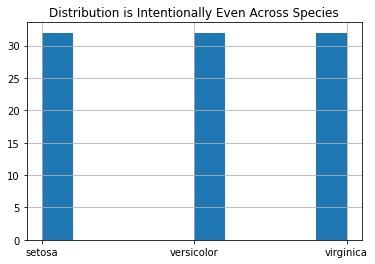

In [68]:
plt.title('Distribution is Intentionally Even Across Species')
train.species.hist()
plt.show()

In [69]:
train.dtypes

species                object
sepal_length          float64
sepal_width           float64
petal_length          float64
petal_width           float64
species_versicolor      uint8
species_virginica       uint8
dtype: object

#### a. For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [70]:
train.sepal_length.describe()

count    96.000000
mean      5.833333
std       0.860559
min       4.300000
25%       5.100000
50%       5.700000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64

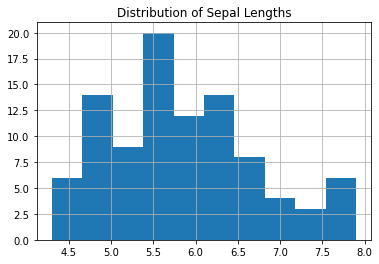

In [62]:
plt.title('Distribution of Sepal Lengths')
train.sepal_length.hist()
plt.show()

<AxesSubplot:title={'center':'Boxplot of Sepal Length'}, xlabel='species', ylabel='sepal_length'>

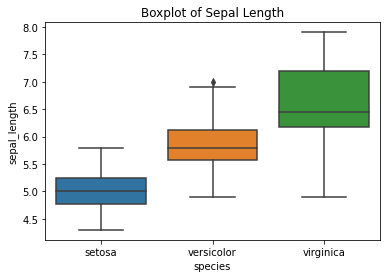

In [56]:
plt.title('Boxplot of Sepal Length By Species')
sns.boxplot(data = train, x = 'species', y = 'sepal_length')

In [71]:
train.sepal_width.describe()

count    96.000000
mean      3.041667
std       0.423933
min       2.000000
25%       2.775000
50%       3.000000
75%       3.325000
max       4.200000
Name: sepal_width, dtype: float64

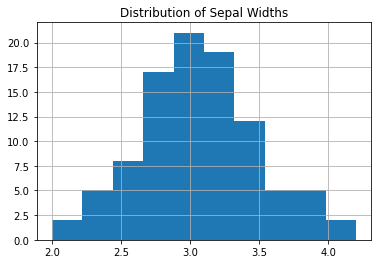

In [63]:
plt.title('Distribution of Sepal Widths')
train.sepal_width.hist()
plt.show()

<AxesSubplot:title={'center':'Boxplot of Sepal Width By Species'}, xlabel='species', ylabel='sepal_width'>

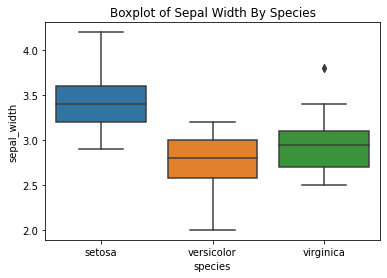

In [57]:
plt.title('Boxplot of Sepal Width By Species')
sns.boxplot(data = train, x = 'species', y = 'sepal_width')

In [72]:
train.petal_length.describe()

count    96.000000
mean      3.739583
std       1.795520
min       1.000000
25%       1.500000
50%       4.200000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64

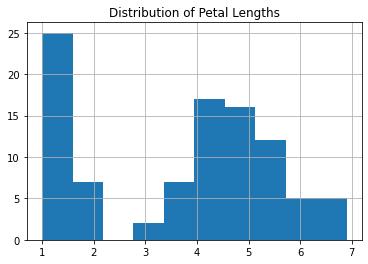

In [66]:
plt.title('Distribution of Petal Lengths')
train.petal_length.hist()
plt.show()

<AxesSubplot:title={'center':'Boxplot of Petal Length By Species'}, xlabel='species', ylabel='petal_length'>

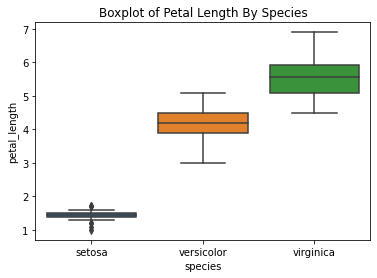

In [58]:
plt.title('Boxplot of Petal Length By Species')
sns.boxplot(data = train, x = 'species', y = 'petal_length')

In [73]:
train.petal_width.describe()

count    96.000000
mean      1.164583
std       0.750576
min       0.100000
25%       0.200000
50%       1.300000
75%       1.800000
max       2.400000
Name: petal_width, dtype: float64

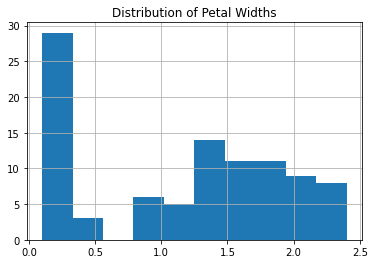

In [67]:
plt.title('Distribution of Petal Widths')
train.petal_width.hist()
plt.show()

<AxesSubplot:title={'center':'Boxplot of Petal Width By Species'}, xlabel='species', ylabel='petal_width'>

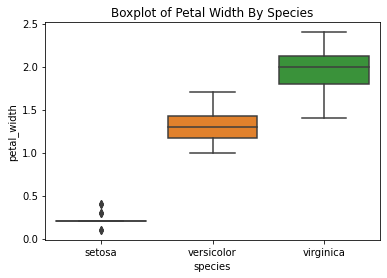

In [59]:
plt.title('Boxplot of Petal Width By Species')
sns.boxplot(data = train, x = 'species', y = 'petal_width')

#### b. For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

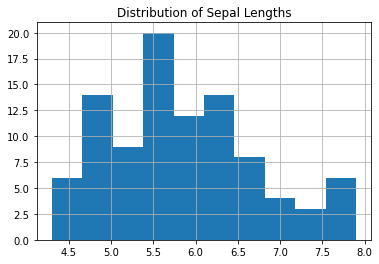

In [74]:
plt.title('Distribution of Sepal Lengths')
train.sepal_length.hist()
plt.show()

In [ ]:
# How should I make a bar plot of these frequencies?

#### c. Document takeaways & any actions.

### 3. Bivariate Stats

#### a. Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

#### b. For each measurement type, compute the descriptive statistics for each species.

#### c. For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

#### d. Document takeaways & any actions.

### 3. Multivariate Stats

#### a. Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

#### b. Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col

#### c. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

#### d. Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

#### e. Document takeaways and any actions.

## Exercises - Part II:

### Explore your titanic dataset more completely.

#### a. Determine drivers of the target variable.

#### b. Determine if certain columns should be dropped.

#### c. Determine if it would be valuable to bin some numeric columns.

#### d. Determine if it would be valuable to combine multiple columns into one.

#### e. Does it make sense to combine any features?

#### f. Do you find any surprises?

#### g. Document any and all findings and takeaways in your notebook using markdown.

## Exercises - Part III:

### Explore your telco data to discover drivers of churn

#### a. Determine if certain columns should be dropped

#### b. Determine if certain columns should be dropped.

#### c. Determine if it would be valuable to bin some numeric columns.

#### d. Determine if it would be valuable to combine multiple columns into one.

#### e. What are your drivers of churn?

#### f. Does it make sense to combine any features?

#### g. Do you find any surprises?

#### h. Document any and all findings and takeaways in your notebook using markdown.